In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import(BaggingClassifier, BaggingRegressor, AdaBoostClassifier, 
GradientBoostingClassifier, RandomForestClassifier, StackingClassifier)

from sklearn.metrics import(accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_curve,
roc_auc_score, confusion_matrix, mean_absolute_error, r2_score, classification_report)

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier

# Improving Machine Learning Predictions with Ensemble Learning

# 1. Introduction

In this paper we will look into ensemble learning, its benefits, and how it can be used to improve machine learning predictions. Ensemble learning is a technique that combines numerous base models to generate a more accurate and dependable model. The fundamental notion behind ensemble learning is that the aggregate predictions of multiple models can be more accurate and robust than individual model predictions. When compared to utilizing a single model, ensemble learning takes advantage of the variety among base models to collectively create superior predictions.

### Benefits of Ensemble Learning

 * Improved Predictive Performance: The primary benefit of ensemble learning is improved predictive performance. It can dramatically enhance prediction accuracy. Multiple models with various properties can capture different parts of the underlying data, resulting in improved overall predictions.
 * Reduced Overfitting:  Ensemble learning can improve the model’s generalization performance. Because the diversity across the base models helps to capture the underlying patterns in the data more effectively, ensemble models are less prone to overfitting.
 * Improved Robustness: Ensemble learning can make a model more resistant to noisy or outlier data. The ensemble can lessen the influence of erroneous predictions from individual models and create more accurate findings by combining the predictions of numerous models.
 * Handling Uncertainty: When dealing with uncertain data, ensemble learning can produce superior predictions. The ensemble can reduce uncertainty and produce a more reliable prediction by combining the predictions of numerous models.Some methods, like boosting, focus on samples that are difficult to classify, thereby giving more weight to uncertain instances.
 
Of course, like everything else, there are also some drawbacks of ensemble learning, which we will mention for the sake of completeness.

### Drawbacks of Ensemble Learning

 * Increased Computational Complexity: Ensembles require training and combining multiple models, which can significantly increase computational demands, including time and resources.
 * Model Interpretability: Ensembles can be more challenging to interpret than individual models. Understanding the contributions of each model in the ensemble can be complex, which might be an issue in cases where model interpretability is crucial.
 * Trade-offs in Complexity: Depending on the specific problem, using ensemble techniques may introduce unnecessary complexity, especially when a simpler model would suffice.
 
## Ensemble Learning Techniques

There are several ensemble learning techniques that can be used to combine the predictions of multiple base models. The most commonly used, which we will explain and show with Python, are:

    - Bagging 
    - Boosting 
    - Stacking 
    
 Let's make a quick review of each of the technic before we dive deep into explanation and implementation of each one. 
 
 ### Bagging (Bootstrap Aggregating):
     This learning method involves training multiple base models on distinct subsets of the training data obtained by bootstrapping (randomly sampling with replacement) from the original training data. To make the final prediction, the projections of the base models are integrated, often by taking a majority vote. It is designed to improve the predictive performance and reduce overfitting of models, like decision trees or other base models prone to overfitting.
     
 ### Boosting: 
     This strategy trains many base models sequentially, with each model attempting to repair the faults of the prior models. Boosting gives misclassified samples in the training set higher weights, and the base models are trained to focus on these examples. To create the final prediction, the predictions of the base models are integrated, often via weighted voting. Boosting is an iterative process that results in a strong learner, which is a combination of these weak learners.
  
 ### Stacking (Stacked Generalization):
      Technique in machine learning where multiple diverse models (often called base models or level-0 models) are combined in a two-layer or multi-layer structure to create a single, more robust and accurate model. The key idea behind stacking is to leverage the strengths of different models by training them on the same dataset and then using a meta-model (level-1 model) to combine their predictions.
     
     

# 2 Explanation of Ensemble Learning Techniques

## 2.1 Bagging (Bootstrap Aggregating)

Bagging is an acronym for Bootstrap Aggregating, and it is a potent ensemble learning strategy that has been shown to improve model performance. It's a tehnique in which numerous instances of the same base model are trained on distinct portions of the training data. The subsets are generated via bootstrapping, which involves randomly selecting the training data with replacement. Each base model is trained on its own bootstrapped subset of data. The underlying models’ forecasts are then integrated using a voting or averaging procedure to produce the final prediction.

#### Bootstrapping

Let’s begin by defining bootstrapping. This statistical technique consists in generating samples of size B (called bootstrap samples) from an initial dataset of size N by randomly drawing with replacement B observations.

<img src="./Images/Bootstraping.webp" width="900">

Under certain conditions, these samples exhibit strong statistical characteristics. They can be viewed as drawn from the actual but often unknown data distribution, and they are independent from each other, making them almost representative and independent (almost i.i.d. samples). Two conditions must be met for this to be valid: the initial dataset size (N) should capture the underlying distribution's complexity (representativity), and N should be sufficiently large compared to the bootstrap sample size (B) to ensure independence. Bootstrap samples are frequently used to estimate the variance or confidence intervals of statistical estimators, which are functions of observations. Since obtaining truly independent samples often requires too much data, we generate these "almost-representative" and "almost-independent" 
bootstrap samples to approximate the estimator's variance by evaluating it on each sample.

#### Bagging

When training a model, no matter if we are dealing with a classification or a regression problem, we obtain a function that takes an input, returns an output and that is defined with respect to the training dataset. Due to the theoretical variance of the training dataset (we remind that a dataset is an observed sample coming from a true unknown underlying distribution). The idea of bagging is then simple: we want to fit several independent models and “average” their predictions in order to obtain a model with a lower variance. However, we can’t, in practice, fit fully independent models because it would require too much data. So, we rely on the good “approximate properties” of bootstrap samples (representativity and independence) to fit models that are almost independent.

The bootstrapped samples are first created. Then, either a regression or classification algorithm is applied to each sample. Finally, in the case of regression, an average is taken over all the outputs predicted by the individual learners. For classification either the most voted class is accepted (hard-voting), or the highest average of all the class probabilities is taken as the output (soft-voting). This is where aggregation comes into the picture.

<h3><center>Simple average for a reggresion problem</center></h3>

$$ \hat{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i $$ 

$\hat{Y}$ represents the estimated or predicted values in the regression problem.

$n$ is the total number of data points or observations in the dataset.

$\sum_{i=1}^{n}$ signifies the summation over all data points.

$Y_i$ represents the actual observed values or responses in the dataset.

<h3><center>Simple majority vote for a classification problem</center></h3>

$$\hat{Y} = \arg\max_{y} \sum_{i=1}^{n} \mathbb{I}(Y_i = y) $$

$\hat{Y}$ represents the ensemble's prediction.

$\arg\max_{y}$ finds the value of yy that maximizes the expression.

$Y_i$ represents the individual predictions from the classifiers or models.

$n$ is the total number of classifiers or models.

$\mathbb{I}(Y_i = y)$ is an indicator function that equals 1 when $Y_i$ is equal to $y$ and 0 otherwise.

Let's see the bagging method in action using the 'Boston Housing' dataset. The primary aim here is to illustrate the distinctions between two models, the focus is on highlighting the raw differences and advantages of Bootstrap Aggregating (bagging). At this stage, we won't be tuning hyperparameters or engaging in feature engineering.

In [2]:
# Col names of the DF
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#Read the DF
boston_housing = pd.read_csv("Data/housing.csv", header = None, delimiter=r"\s+", names=column_names)

#Show the DF
boston_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
#train DF
X = boston_housing.iloc[:, :13]
y = boston_housing.iloc[:, -1]

#Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#DecisionTree model
dt_model = DecisionTreeRegressor(random_state = 3)

#Bagging classifier
bagging = BaggingRegressor(base_estimator=dt_model, n_estimators=500, random_state=1)

#Train the models
dt_model.fit(X_train, y_train)
bagging.fit(X_train, y_train)

#Predict on the testing df
dt_predict = dt_model.predict(X_test)
bagging_predict = bagging.predict(X_test)

#Compare the accuracy of the models
dt_mse = mean_squared_error(y_test, dt_predict)
bagging_mse = mean_squared_error(y_test, bagging_predict)

print("Decision Tree MSE:", dt_mse)
print("Bagging Regressor MSE:", bagging_mse)

Decision Tree MSE: 26.37019736842105
Bagging Regressor MSE: 8.284083276052641


#### Summary
As anticipated, the Bagging Regressor has clearly outperformed the Decision Tree model, with the MSE (Mean Squared Error) being more than twice as favorable for the Bagging Regressor. This outcome aligns with our initial expectations. However, it's essential not to underestimate the importance of this comparison, as it underscores the substantial advantages of Bootstrap Aggregating (bagging) and its capacity to improve model accuracy. Notably, this accentuates the compelling nature of bagging as an approach, even in scenarios where its superiority is predictable.

A critical factor to consider when contemplating the utilization of bagging is its effectiveness on stable models. For instance, when applying bagging to inherently stable models like linear regression, which inherently have low variance, the potential for significant improvements is relatively restricted. In such cases, the primary outcome involves extended learning time and unwarranted model complexity.

## 2.2 Boosting

As we mentioned previously, Boosting is a strategy that leverages the errors made by weaker learners. It prioritizes samples that were incorrectly categorized in prior iterations, enabling the model to learn from its mistakes and progressively enhance its performance by adjusting the weights of misclassified instances. Usually, the main steps to train a boosting algorithm are:
 1. Initialise weights: At the start of the process, each training example is given equal weight.
 2. Train a weak learner: The weighted training data is used to train a weak learner. A weak learner is a simple model that outperforms random guessing only marginally. A decision tree with a few levels, for example, can be employed as a weak learner.
 3. Error calculation: The error of the weak learner on the training data is computed. The weighted sum of misclassified cases constitutes the error.
 4. Update weights: Weights are updated according to the mistake rate of the training examples. Misclassified examples are given higher weights, whereas correctly classified examples are given lower weights.
 5. Repeat: Steps 2–4 are repeated several times. A new weak learner is trained on the updated weights of the training examples in each cycle.
 6. Combine weak learners: The final model is made up of all of the weak learners that were trained in the preceding steps. The accuracy of each weak learner is weighted, and the final prediction is based on the weighted total of the weak learners.
 7. Forecast: The finished model is used to forecast fresh instances’ class labels.

Unlike Bagging Boosting has various methods for enhancing some of them are:

   * AdaBoost (Adaptive Boosting): AdaBoost is one of the most extensively used boosting algorithms. It gives weights to each data point in the training set based on the accuracy of prior models, and then trains a new model using the updated weights. AdaBoost is very useful for classification tasks.
   * Gradient Boosting: Gradient Boosting works by fitting new models to the residual errors of prior models. It minimizes the loss function using gradient descent and may be applied to both regression and classification problems. Popular gradient-boosting implementations include XGBoost and LightGBM.
   * Stochastic Gradient Boosting: Similar to Gradient Boosting, Stochastic Gradient Boosting fits each new model with random subsets of the training data and random subsets of the features. This helps to avoid overfitting and may result in improved performance.
   * LPBoost (Linear Programming Boosting): LPBoost is a boosting algorithm that minimizes the exponential loss function using linear programming. It is capable of handling a wide range of loss functions and may be applied to both regression and classification issues.
   * TotalBoost (Total Boosting): TotalBoost is an AdaBoost and LPBoost boosting method. It works by minimizing a mixture of exponential and linear programming losses, and it can increase accuracy for certain types of problems.

The algorithm chosen will be determined by the specific challenge at hand as well as the features of the dataset.

Let's take a closer look at two of the most used boosting algorithms, 'AdaBoost' and 'Gradient Boosting.' They have slightly different techniques. We will start with 'AdaBoost.

#### AdaBoost

AdaBoost is a specific Boosting algorithm developed for classification problems (also called discrete AdaBoost). The weakness is identified by the weak estimator’s error rate:

$$Error = \frac{\Sigma_{j=1}^n W_j I(C(X_j) \neq Y_j)} {\Sigma_{j=1}^n W_j} $$

$n$ is the number of samples

$W_j$ is the weight of the $j$th sample

$I(C(X_j) \neq Y_j$ is an indicator function that is equal to 1 if the prediction of the classifier $C$ for the $j$ sample is different from the ground truth label $Y_j$, and 0 otherwise

In each iteration, AdaBoost identifies miss-classified data points, increasing their weights (and decrease the weights of correct points, in a sense) so that the next classifier will pay extra attention to get them right. AdaBoost trains a sequence of models with augmented sample weights, generating ‘confidence’ coefficients Alpha for individual classifiers based on errors. Low errors leads to large Alpha, which means higher importance in the voting.

<img src="./Images/AdaBoost.webp" width="600">

#### Gradient Boosting

Gradient boosting approaches the problem a bit differently. Instead of adjusting weights of data points, Gradient boosting focuses on the difference between the prediction and the ground truth. Gradient boosting requires a differential loss function and works for both regression and classifications.

$$S_L(.) = \sum_{l=1}^{L} c_l \times \omega_l(.)$$

where 
$c_l$ are the coefficients $\omega_l$ are the weak learners

The main difference with adaptative boosting is in the definition of the sequential optimisation process. Indeed, gradient boosting casts the problem into a gradient descent one: at each iteration we fit a weak learner to the opposite of the gradient of the current fitting error with respect to the current ensemble model. Let’s try to clarify this last point. First, theoretical gradient descent process over the ensemble model can be written

$s_l(.) = s_l-1(.) - c_l \times \Delta_{sl-1} E(s_l-1)(.)$

where $E(.)$ is the fitting error of the given model, $c_l$ is a coefficient corresponding to the step size and

$-\Delta_{sl-1} E(s_l-1)(.)$

is the opposite of the gradient of the fitting error with respect to the ensemble model at step $l-1$. This (pretty abstract) opposite of the gradient is a function that can, in practice, only be evaluated for observations in the training dataset (for which we know inputs and outputs): these evaluations are called pseudo-residuals attached to each observations. Moreover, even if we know for the observations the values of these pseudo-residuals, we don’t want to add to our ensemble model any kind of function: we only want to add a new instance of weak model. So, the natural thing to do is to fit a weak learner to the pseudo-residuals computed for each observation. Finally, the coefficient $c_l$ is computed following a one dimensional optimisation process (line-search to obtain the best step size $c_l$).

<img src="./Images/GradientBoosting.webp" width="600">

So, assume that we want to use gradient boosting technique with a given family of weak models. At the very beginning of the algorithm (first model of the sequence), the pseudo-residuals are set equal to the observation values. Then, we repeat L times (for the L models of the sequence) the following steps:

 * fit the best possible weak learner to pseudo-residuals (approximate the opposite of the gradient with respect to the current strong learner)
 * compute the value of the optimal step size that defines by how much we update the ensemble model in the direction of the new weak learner
 * update the ensemble model by adding the new weak learner multiplied by the step size (make a step of gradient descent)
 * compute new pseudo-residuals that indicate, for each observation, in which direction we would like to update next the ensemble model predictions

Repeating these steps, we have then build sequentially our L models and aggregate them following a gradient descent approach. Notice that, while adaptative boosting tries to solve at each iteration exactly the “local” optimisation problem (find the best weak learner and its coefficient to add to the strong model), gradient boosting uses instead a gradient descent approach and can more easily be adapted to large number of loss functions. Thus, gradient boosting can be considered as a generalization of adaboost to arbitrary differentiable loss functions.

Let's see how the two algorithms will present on the well known "Titanic" dataset, again we won't be tuning hyperparameters or engaging in feature engineering more than we need to.

In [4]:
#Read the Titanic dateset
titanic_data = pd.read_csv("Data/titanic_data.csv")

##Prepare the df for training
#Check the missing values
titanic_data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Calculate the median age by class and sex
grouped_age_median = titanic_data.groupby(["Pclass", "Sex"])["Age"].transform('median')

#make a copy of the df
titanic_data_median_age = titanic_data.copy()

#fillthe missing age values with the median
titanic_data_median_age["Age"].fillna(grouped_age_median, inplace = True)

#One hot encoding the gender columns
titanic_data_median_age = pd.get_dummies(titanic_data_median_age, columns=['Sex'])

#check again for NA
titanic_data_median_age.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_female       0
Sex_male         0
dtype: int64

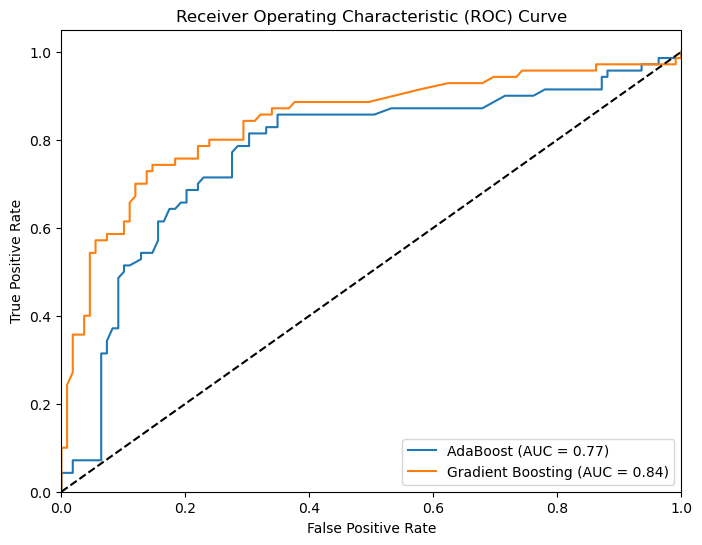

AdaBoost Metrics:
Accuracy: 0.7262569832402235
Precision: 0.6296296296296297
Recall: 0.7285714285714285
F1 Score: 0.6754966887417219

Gradient Boosting Metrics:
Accuracy: 0.8044692737430168
Precision: 0.7611940298507462
Recall: 0.7285714285714285
F1 Score: 0.7445255474452556


In [6]:
#Prepare data
X = titanic_data_median_age.drop(columns=['Survived', 'Cabin', 'Embarked', 'Name', 'Ticket'])
y = titanic_data_median_age['Survived']

#Split the df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


# Create AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Create Gradient Boosting Classifier
gradientboost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradientboost_model.fit(X_train, y_train)

# Make predictions
adaboost_pred = adaboost_model.predict(X_test)
gradientboost_pred = gradientboost_model.predict(X_test)

# Calculate classification metrics
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred)
adaboost_recall = recall_score(y_test, adaboost_pred)
adaboost_f1_score = f1_score(y_test, adaboost_pred)

gradientboost_accuracy = accuracy_score(y_test, gradientboost_pred)
gradientboost_precision = precision_score(y_test, gradientboost_pred)
gradientboost_recall = recall_score(y_test, gradientboost_pred)
gradientboost_f1_score = f1_score(y_test, gradientboost_pred)

# Calculate ROC and AUC for AdaBoost
adaboost_proba = adaboost_model.predict_proba(X_test)[:, 1]
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_proba)
adaboost_roc_auc = roc_auc_score(y_test, adaboost_proba)

# Calculate ROC and AUC for Gradient Boosting
gradientboost_proba = gradientboost_model.predict_proba(X_test)[:, 1]
gradientboost_fpr, gradientboost_tpr, _ = roc_curve(y_test, gradientboost_proba)
gradientboost_roc_auc = roc_auc_score(y_test, gradientboost_proba)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(adaboost_fpr, adaboost_tpr, label=f'AdaBoost (AUC = {adaboost_roc_auc:.2f})')
plt.plot(gradientboost_fpr, gradientboost_tpr, label=f'Gradient Boosting (AUC = {gradientboost_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification metrics
print("AdaBoost Metrics:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1 Score:", adaboost_f1_score)

print("\nGradient Boosting Metrics:")
print("Accuracy:", gradientboost_accuracy)
print("Precision:", gradientboost_precision)
print("Recall:", gradientboost_recall)
print("F1 Score:", gradientboost_f1_score)


#### Summary

When choosing a model for a machine learning task, it is essential to determine the desired outcome. Are you more inclined towards achieving higher precision, which ensures that positive predictions are accurate? Or do you prioritize recall, emphasizing the minimization of missed positive cases? Alternatively, you might seek a balance between the two by aiming for a high F1 score, a metric that harmoniously combines precision and recall. This balance is particularly useful when you want to strike a balance between minimizing false positives and false negatives.

Another way to choose between models is by considering the AUC (Area Under the Receiver Operating Characteristic Curve). AUC is a versatile and informative metric that offers a holistic assessment of your model's ability to discriminate between classes. It proves especially valuable in cases of class imbalance and when comparing more than two models.

However, it's crucial to be aware of some of the limitations and considerations. Notably, when applying ensemble methods like AdaBoost or Gradient Boosting, you might encounter increased computational complexity and longer training times compared to using individual models.

In this classification task, both AdaBoost and Gradient Boosting demonstrate relatively good performance. The Gradient Boosting model achieved a higher accuracy rate, approximately 80%, while AdaBoost scored around 73%. Similarly, Gradient Boosting demonstrated superior precision (76% compared to AdaBoost's 63%) and an F1 score of 0.74, highlighting its overall better classification accuracy.

The results suggest that Gradient Boosting is a more effective algorithm for this specific classification task. The choice between these two models depends on specific requirements, trade-offs between precision and recall, and the importance of achieving high accuracy in classification.

## 2.3 Stacking

Stacking is a machine learning strategy that combines the predictions of numerous base models, also known as first-level models or base learners, to obtain a final prediction. It entails training numerous base models on the same training dataset, then feeding their predictions into a higher-level model, also known as a meta-model or second-level model, to make the final prediction. The main idea behind stacking is to combine the predictions of different base models in order to get more extraordinary predictive performance than utilizing a single model.

It mainly differ from bagging and boosting on two points. First stacking often considers heterogeneous weak learners (different learning algorithms are combined) whereas bagging and boosting consider mainly homogeneous weak learners. Second, stacking learns to combine the base models using a meta-model whereas bagging and boosting combine weak learners following deterministic algorithms.


Here’s a detailed description of how stacking works:

  1. Preparing the Data: The first step is to prepare the data for modeling. This entails identifying the relevant features, cleaning the data, and dividing it into training and validation sets.
  2.  Model Selection: The following step is to choose the base models that will be used in the stacking ensemble. A broad selection of models is typically chosen to guarantee that they produce different types of errors and complement one another.
  3. Training the Base Models: After selecting the base models, they are trained on the training set. To ensure diversity, each model is trained using a different algorithm or set of hyperparameters.
  4. Predictions on the Validation Set: Once the base models have been trained, they are used to make predictions on the validation set.
  5. Developing a Meta Model: The next stage is to develop a meta-model, also known as a meta learner, which will take the predictions of the underlying models as input and make the final prediction. Any algorithm, such as linear regression, logistic regression, or even a neural network, can be used to create this model.
  6. Training the Meta Model: The meta-model is then trained using the predictions given by the base models on the validation set. The base models’ predictions serve as features for the meta-model.
  7. Making Test Set Predictions: Finally, the meta-model is used to produce test set predictions. The basic models’ predictions on the test set are fed into the meta-model, which then makes the final prediction.
  8. Model Evaluation: The final stage is to assess the stacking ensemble’s performance. This is accomplished by comparing the stacking ensemble’s predictions to the actual values on the test set using evaluation measures such as accuracy, precision, recall, F1 score, and so on.

In the end, the goal of stacking is to combine the strengths of various base models by feeding them into a meta-model, which learns how to weigh and combine their forecasts to generate the final prediction. This can frequently result in higher performance than utilizing a single model alone.

#### Multi-levels Stacking

Multi-level stacking is an advanced extension of the stacking technique, introducing multiple layers to create a highly sophisticated ensemble model. Imagine a scenario involving a 3-level stacking framework. Each level represents a distinct phase in the ensemble model's construction, introducing increased complexity and predictive power:

 * First Level (Base Models): At the base level, denoted as the first layer, we start by fitting L weak learners, which have been thoughtfully selected based on their unique capabilities and characteristics. These base models are individually trained on the initial input data and generate their predictions.
 * Second Level (Intermediate Models): Instead of having a single meta-model, as typically seen in traditional stacking, we incorporate M meta-models. These intermediate models, often more complex than the base models, take on the task of analyzing the predictions produced by the first layer. They receive both the original features and the predictions from the base models as inputs and, in turn, generate their own set of predictions.
 * Third Level (Final Meta-Model): Finally, the third layer houses the ultimate decision-maker: the last meta-model. This meta-model, placed atop the multi-level stacking hierarchy, receives as inputs the predictions provided by the M intermediate models from the second level. Its responsibility is to consolidate these intermediate predictions and generate the final, comprehensive prediction.
 
 From a practical standpoint, it's important to note that each meta-model at the different levels of a multi-level stacking ensemble model can employ a wide range of learning algorithms. These algorithms can vary significantly, and you have the flexibility to choose them based on the specific requirements and complexities of your problem. This adaptability is a significant advantage of multi-level stacking.

However, it's essential to be aware that the introduction of multiple levels in stacking can come with certain costs. Firstly, it can be data-expensive if a k-folds-like technique is not employed, as more data are required to train and validate multiple layers effectively. Alternatively, it can be time-expensive if a k-folds-like technique is used. In this case, a substantial number of models must be fitted, which can be computationally intensive.

The choice to implement multi-level stacking is a strategic one, often made based on the nature of the problem, the available data, and the need for increased predictive accuracy. While it introduces complexities, it also offers a pathway to unlocking hidden patterns and relationships within the data, making it a powerful tool in advanced machine learning scenarios.

Let's make a quick implementation of the stacking method.

In [7]:
# Col names of the DF
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#Read the DF
boston = pd.read_csv("Data/housing.csv", header = None, delimiter=r"\s+", names=column_names)

#train DF
X = boston_housing.iloc[:, :13]
y = boston_housing.iloc[:, -1]

#Split the df into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Train the base models
dt = DecisionTreeRegressor(random_state=3)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=3)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(random_state=3)
gb.fit(X_train, y_train)

# Make predictions on the validation set
dt_pred = dt.predict(X_val)
rf_pred = rf.predict(X_val)
gb_pred = gb.predict(X_val)

# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(X_val_meta, y_val)

# Make predictions on new data random data
X_new = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]])

dt_pred_new = dt.predict(X_new)
rf_pred_new = rf.predict(X_new)
gb_pred_new = gb.predict(X_new)

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((dt_pred_new, rf_pred_new, gb_pred_new))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)

print("Predicted median value of owner-occupied homes: ${:.2f} thousand".format(y_new_pred[0]))

Predicted median value of owner-occupied homes: $46.51 thousand


Here we can see how the model manages new data.

In [8]:
# Calculate predictions for the validation set
y_pred = meta_model.predict(X_val_meta)

# Compute regression metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the regression metrics
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R2) Score: {:.2f}".format(r2))

Mean Squared Error (MSE): 6.31
Root Mean Squared Error (RMSE): 2.51
Mean Absolute Error (MAE): 1.93
R-squared (R2) Score: 0.93


#### Summary 

In our analysis, we evaluated the model's performance on the validation set. The model's performance, as indicated by various error metrics, is promising. The lower the error metrics, the better the model's predictive accuracy.

One crucial metric, R-squared (R2), measures how effectively the model explains the variance in the data. An R2 value of approximately 0.93 implies that the stacking model accounts for around 93% of the variance in the target variable. This high R2 suggests that the model fits the data well and effectively captures the underlying patterns.

The choice of which specific metric(s) to report should be guided by your target audience, the project's goals, and the specific characteristics of the regression problem. In our case, we have chosen to present all the relevant metrics to provide a comprehensive overview of the model's performance.

# 3 Comparison of Machine learning techniques on a real world problem

In this part of the paper we will examine a problem that can be solved with data science and machine learning methods.

## Visa Project

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a 9% increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. The objective is to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

   * case_id: ID of each visa application
   * continent: Information of continent of the employee
   * education_of_employee: Information of education of the employee
   * has_job_experience: Does the employee has any job experience? Y= Yes; N = No
   * requires_job_training: Does the employee require any job training? Y = Yes; N = No
   * no_of_employees: Number of employees in the employer's company
   * yr_of_estab: Year in which the employer's company was established
   * region_of_employment: Information of foreign worker's intended region of employment in the US.
   * prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
   * unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
   * full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
   * case_status: Flag indicating if the Visa was certified or denied



## Data Overview

- Observations
- Sanity checks

In [9]:
#Reading the df
data=pd.read_csv("Data/EasyVisa.csv")
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [10]:
#Check for NA
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values in the dataset

In [11]:
#Check the datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* All other attributes are of object type and will need to be converted to the right datatype

In [12]:
#select only datatype = obeject
cols = data.select_dtypes(['object'])

#Convert the object to category
for i in cols.columns:
    data[i] = data[i].astype('category')

#check the new datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* All datatypes of object type have been coverted to category. The memory usage has also decreased from 2.3+MB to 2MB

### Summary of dataset

In [13]:
#Check the statistics 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27



 * The average number of employees in the employer's organization are 5667 while the median number of employees in the employer's organization are 2109. This implies the attribute has a right skewed distribution with several positive outliers. The minimum number is negative which does not appear to be a valid data point
 * There are companies in the dataset with years of establishment from 1800 to 2016
 * The average prevailing wage for occupation is united states is USD 74,455 while the median (~50th percentile of wages) is USD 70,308. This indicates, slight right skewness in the data set. The minimum value of USD 2.1367 does not appear to be a valid data point. The attribute has to be studied in union with unit_of_wage to gather further insight



In [14]:
#Check the category type statistics
data.describe(include = 'category').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* The case ID attribute can be dropped as it is a unique ID variable and is not expected to add any value to the status of a visa being accepted
* There are 6 continents in the database, with majority of applicants from Asia
* There are 4 different levels of eduction with Bachelor's being the highest education degree for majority of applicants
* Majority of applicants do not require further job training to perform the intended occupation in the US
* There are 5 different regions in the US requiring immigrants due to Human Resource shortages, the maximum being in the NorthEast US region
* There are 4 different units of wages with yearly being the most common. The prevailing wage and unit of wage may need to be studied in union to gather further insight
* Majority of the occupation with employee shortages are full time positions
* Case status is the attribute of interest (which needs to be predicted by our ML model). As per dataset, 66.7% of all applicants have a certified visa status and 33.2% have a denied visa status

In [15]:
#Drop the case_id colum
data.drop(['case_id'], axis = 1, inplace=True)

In [16]:
#Check for duplicates 
data[data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no repeat data entries in the dataset that will need further cleaning

## Exploratory Data Analysis (EDA)

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
#removing the negative num of employes 
data.drop(data[data['no_of_employees']<0].index, inplace=True)
data.shape

(25447, 11)

* we removed 33 entries that were negative

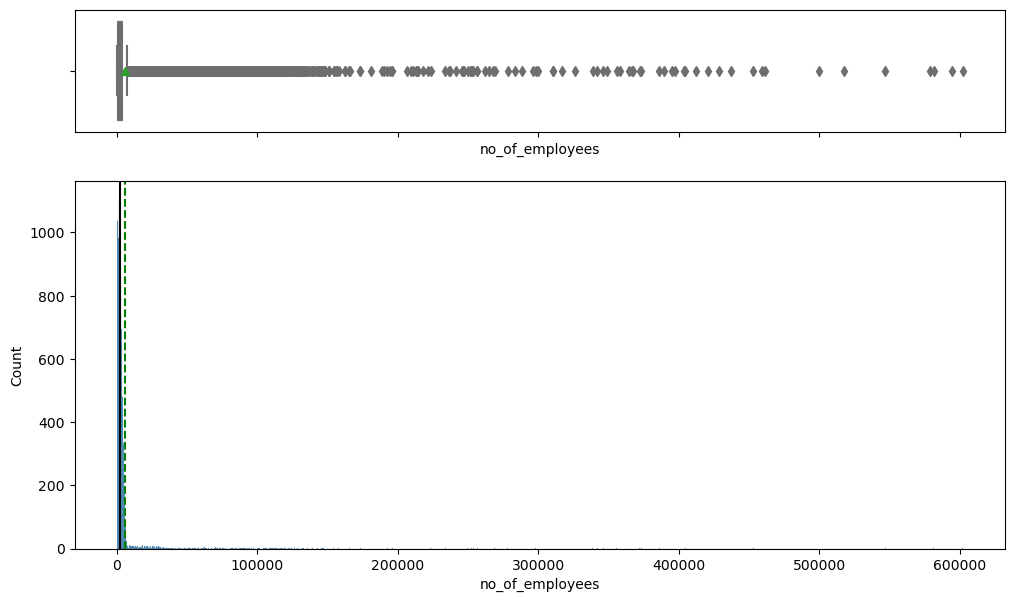

In [19]:
#historgram of number of employees
histogram_boxplot(data, 'no_of_employees')

* The distribution for 'no_of_employees' is heavily skewed right

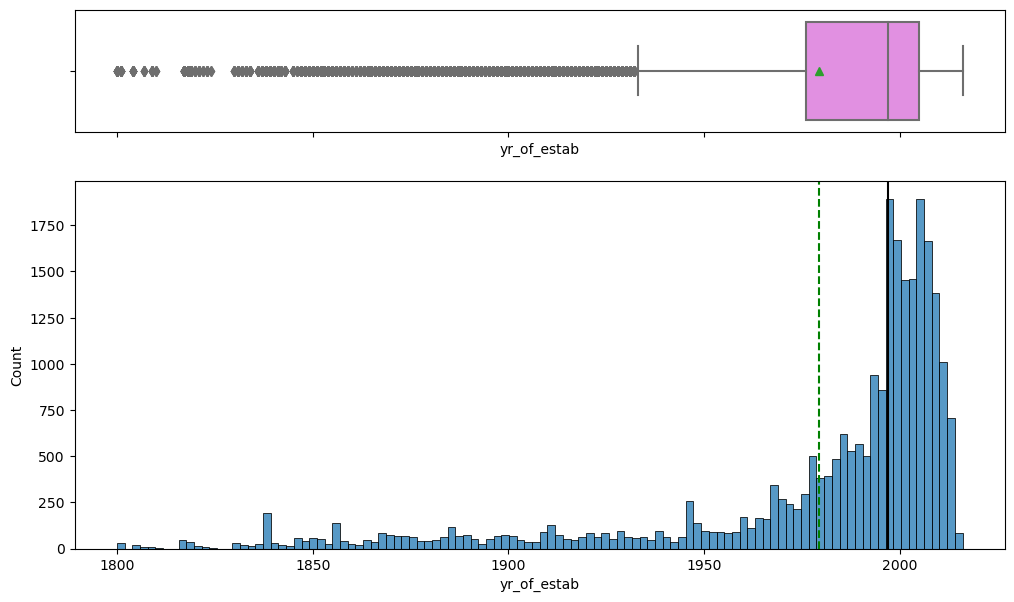

In [20]:
histogram_boxplot(data, "yr_of_estab")

* The distribution for year established is skewed left

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

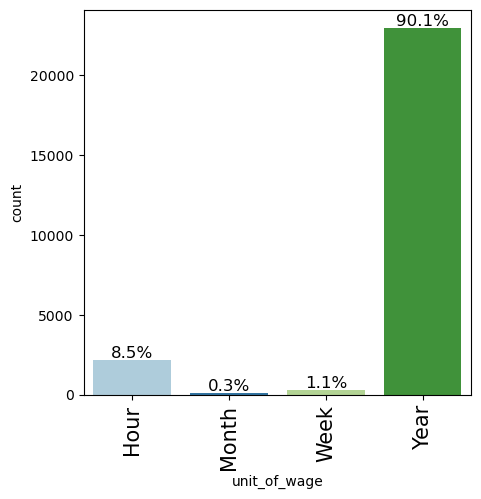

In [22]:
labeled_barplot(data, "unit_of_wage", perc = True)

* Almost 90% of all entries are with unit_of_wage as yearly and only 8.5% entries as hourly. Negligible entries are on a monthly and weekly basis (which requires further investigation)

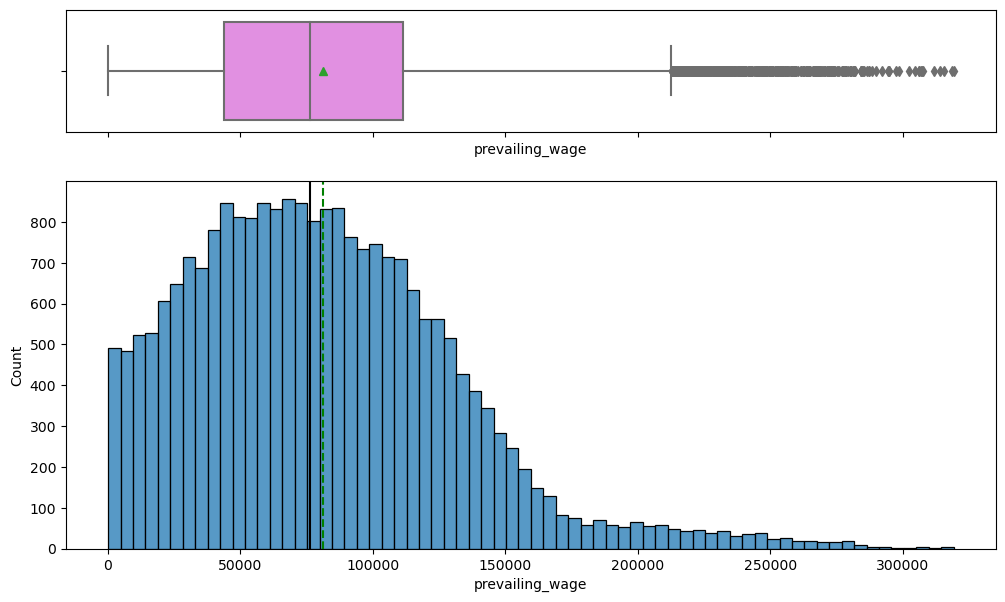

In [23]:
histogram_boxplot(data[(data['unit_of_wage'] == 'Year')], "prevailing_wage")

* The average and median annual salary is approx. USD 70,000 which seems accurate
* The trend appears correct with outliers in the higher income bracket between USD 200,000 to USD 300,000
* There are several very low salaries as well, which appears incorrect and requires further investigation

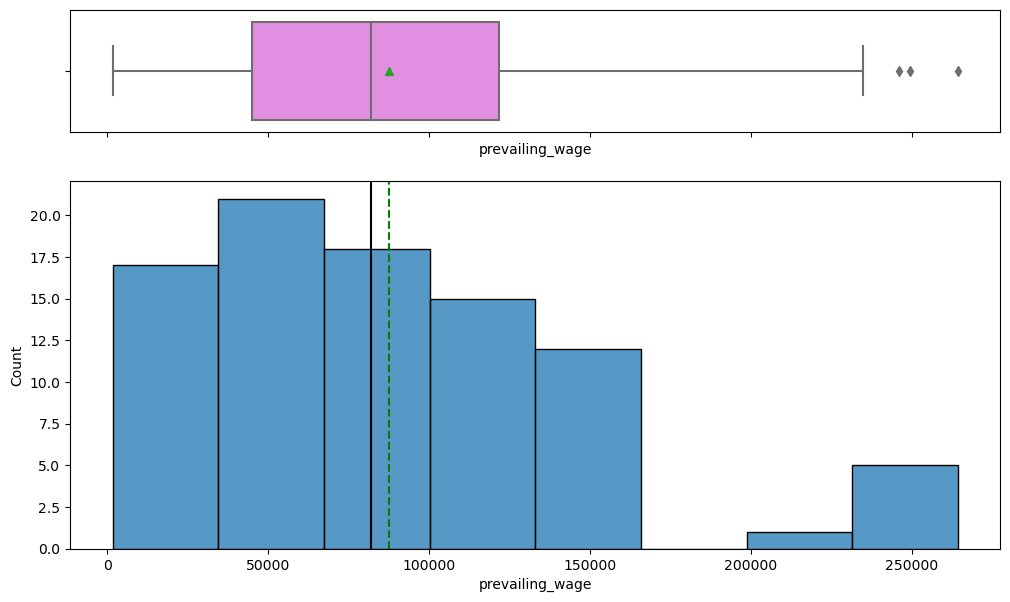

In [24]:
histogram_boxplot(data[(data['unit_of_wage'] == 'Month')], "prevailing_wage")

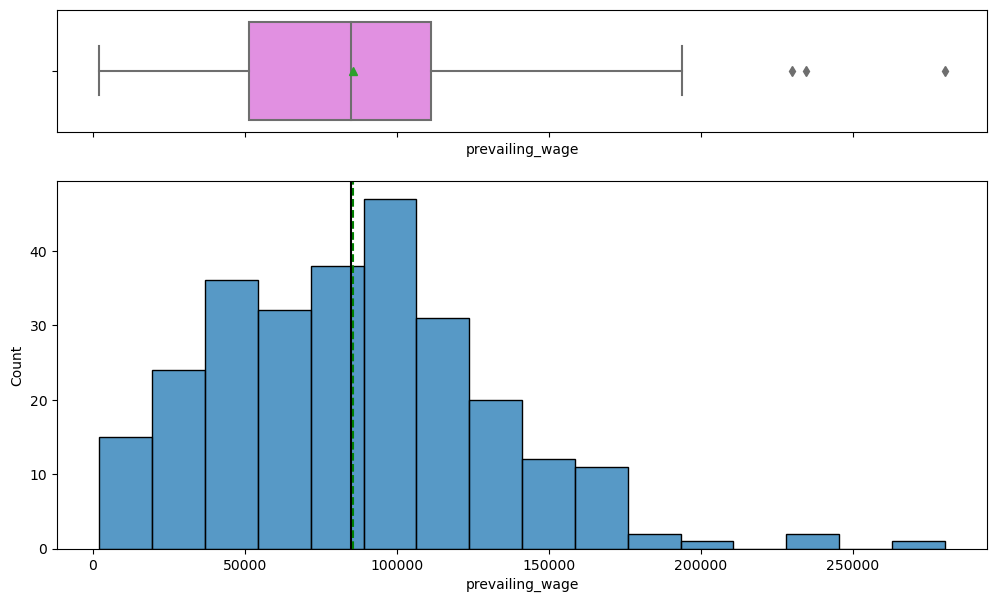

In [25]:
histogram_boxplot(data[(data['unit_of_wage'] == 'Week')], "prevailing_wage")

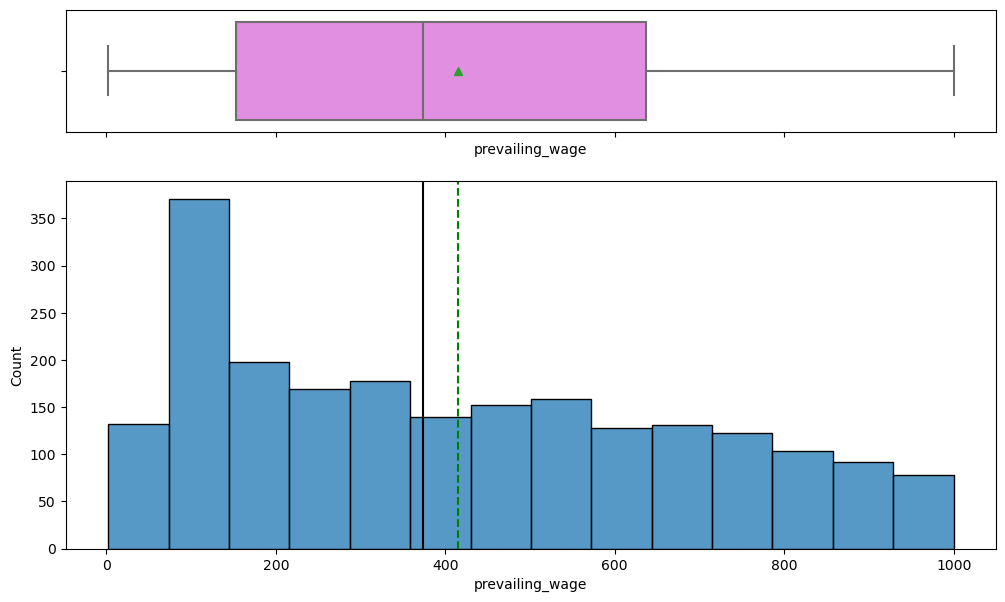

In [26]:
histogram_boxplot(data[(data['unit_of_wage'] == 'Hour')], "prevailing_wage")

* Based on the data we see above, we can infer that the prevailing_wage is likely a weekly salary where unit_of_wage is hourly. (We make this assumption as a median rate of pay of USD 400 per hour appears incorrect.)

#### It can be infered that the dataset is very unclean.
* "Prevailing_wages" will be cleaned up to contain only annual wages, ensuring uniformity for model building.
* "Unit_wages" will be categorized as follows:
   - Not-Hourly: This category applies when an employee receives a fixed salary, regardless of the number of hours worked. Unit_of_wages will inherently be considered as weekly, monthly, or yearly.
   - Hourly: This category applies when an employee's pay is determined based on the number of hours worked. Unit_of_wages will inherently be considered as hourly.

In [27]:
#Assuming there is 52 working weeks in a year
data.loc[data["unit_of_wage"] == "Hour", "prevailing_wage"] = data.loc[data["unit_of_wage"] == "Hour", "prevailing_wage"] * 52

In [28]:
data["unit_of_wage"] = data["unit_of_wage"].astype("object")
data['unit_of_wage'] = np.where(data['unit_of_wage'] == 'Hour', 'Hourly', 'Not_Hourly')
data["unit_of_wage"] = data["unit_of_wage"].astype("category")

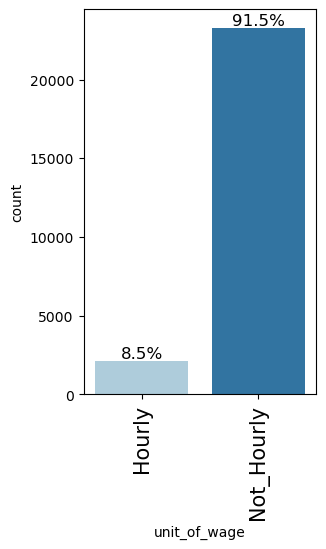

In [29]:
labeled_barplot(data, "unit_of_wage", perc = True)

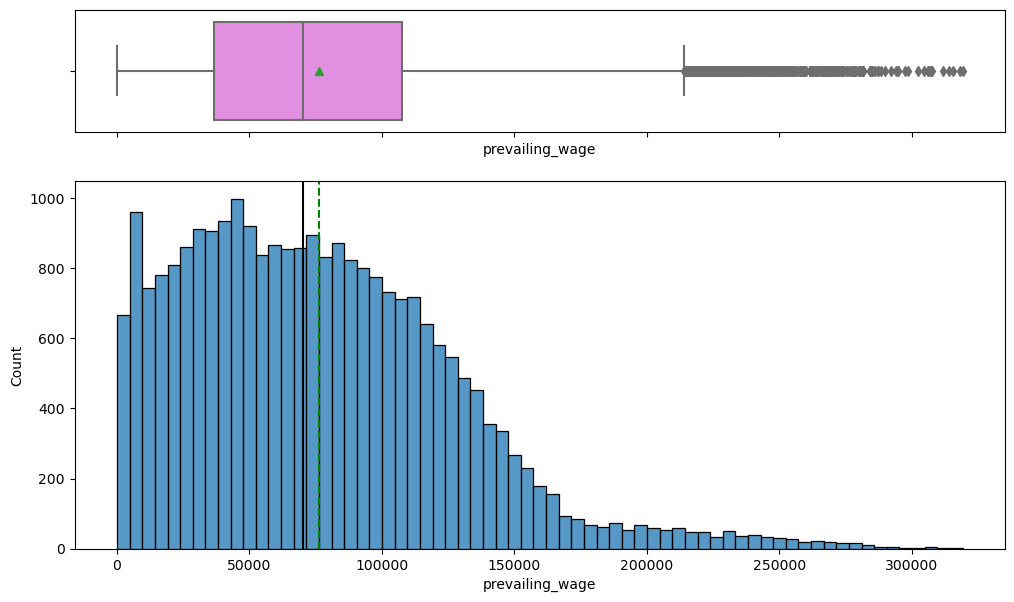

In [30]:
histogram_boxplot(data, "prevailing_wage")

* There are still several lower and upper end outlier in annual_prevailing_wages which requires further investigation

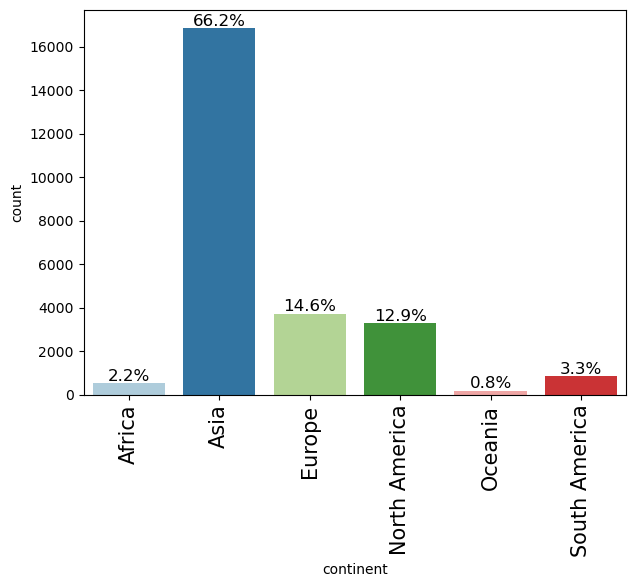

In [31]:
labeled_barplot(data, "continent", perc = True)

* Majority of employees (>50%) are from Asia 

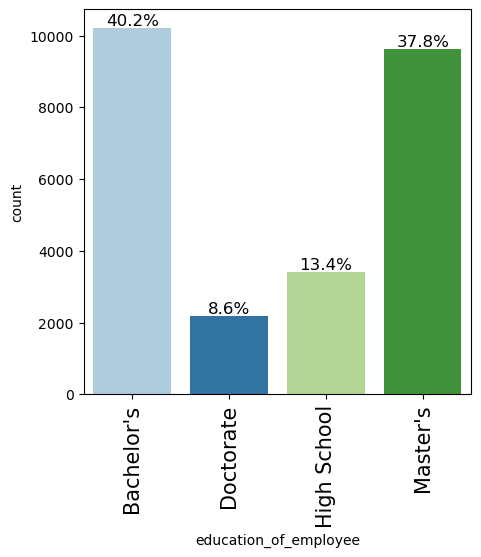

In [32]:
labeled_barplot(data, "education_of_employee", perc = True)

* Majority of employees have either a bachelor's (40%) or a master's (38%) and minority of applicants have either a doctorate (8%) or only a high school diploma (13%)

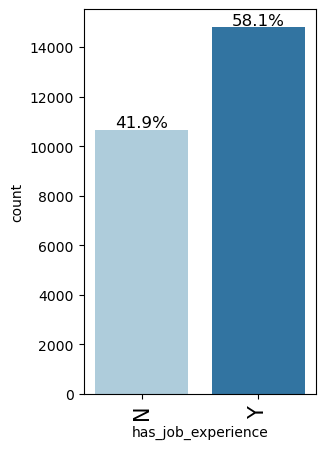

In [33]:
labeled_barplot(data, "has_job_experience", perc = True)

* Around 58% employees have prior job experience and 42% employees do not

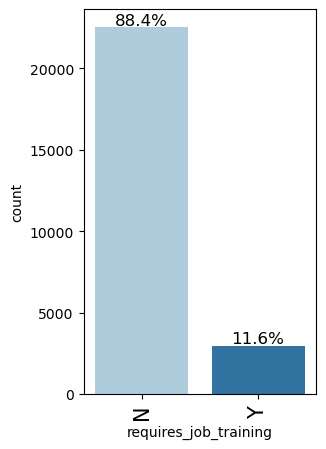

In [34]:
labeled_barplot(data, "requires_job_training", perc = True)

* Most positions (88%) do not require job training. However, it is worth noting that only 58% of these positions require prior job experience, suggesting that some roles may be suitable for candidates without prior experience.

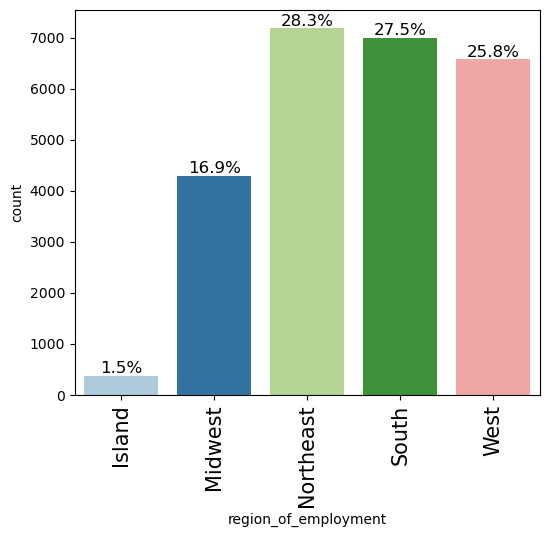

In [35]:
labeled_barplot(data, "region_of_employment", perc = True)

* In terms of employment opportunities with Human Resource shortages, the Northeast, South, and West regions share a nearly equal distribution, with 25-28% of employees applying for visa approval to these areas. The Midwest region follows with 18%, while the Island region has a notably lower percentage, at 1.5%.

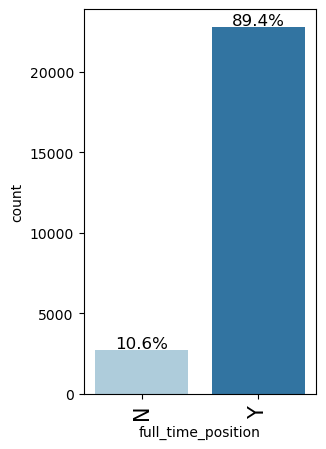

In [36]:
labeled_barplot(data, "full_time_position", perc = True)

* Majority of the positions are full time

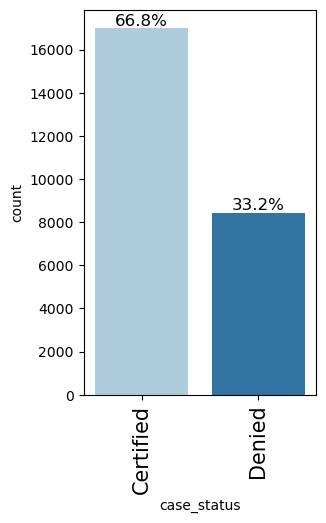

In [37]:
labeled_barplot(data, "case_status", perc = True)

* Approximately, 67% cases are approved and 33% cases are denied

### Bivariate analysis and data preprocessing 

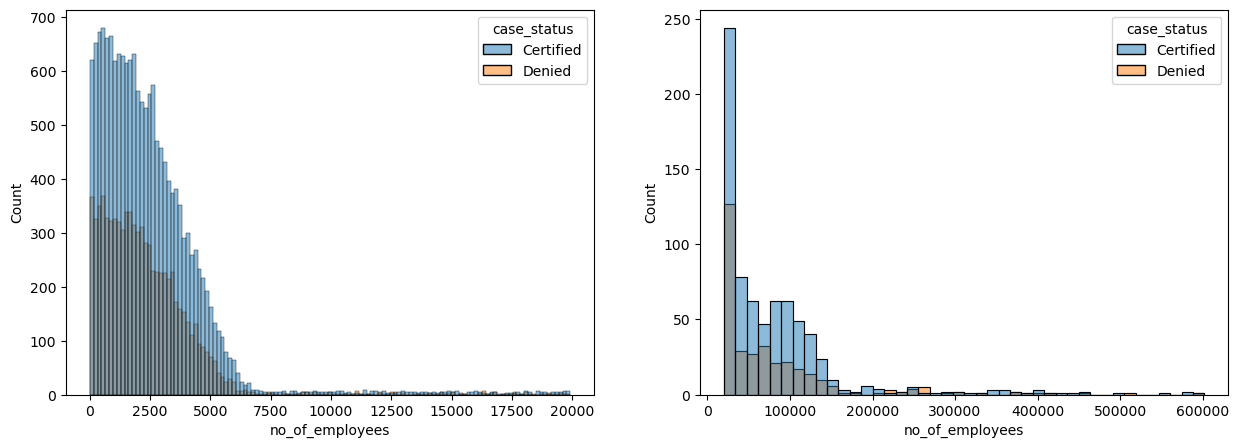

In [38]:
#number of employees and case status
fig, ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data[data["no_of_employees"] < 20000], x = "no_of_employees", hue = "case_status", ax = ax[0]);
sns.histplot(data=data[data["no_of_employees"] > 20000], x = "no_of_employees", hue = "case_status", ax = ax[1]);

* There are more than twice as many certified cases as denied cases, regardless of the number of employees in an organization
* While the dataset contains a large number of outliers, the machine learning model, which is based on decision trees, automatically optimizes and bins the data. To reduce model building time, we can choose to pre-bin continuous data into three practical bins. This decision is based on the absence of a clear relationship between case certification and the number of employees in an organization, as observed in the exploratory data analysis.

In [39]:
data["no_of_employees"] = pd.cut(data["no_of_employees"],\
                                [0,2500,7500, np.inf],\
                                labels = ["Small_Sized(<2500employees)", \
                                            "Medium_Sized(2500-7500employees)", \
                                            "Large_Sized(>7500employees)"])
data["no_of_employees"] = data["no_of_employees"].astype("category")

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    # Plot the stacked bar chart
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    
    # Rotate x-axis labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    # Display the percentage in the middle of the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', va='center')
   
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Example usage:
# stacked_barplot(your_data, 'predictor_column', 'target_column')


case_status                       Certified  Denied    All
no_of_employees                                           
All                                   17001    8446  25447
Small_Sized(<2500employees)            9674    5084  14758
Medium_Sized(2500-7500employees)       6272    2874   9146
Large_Sized(>7500employees)            1055     488   1543
------------------------------------------------------------------------------------------------------------------------


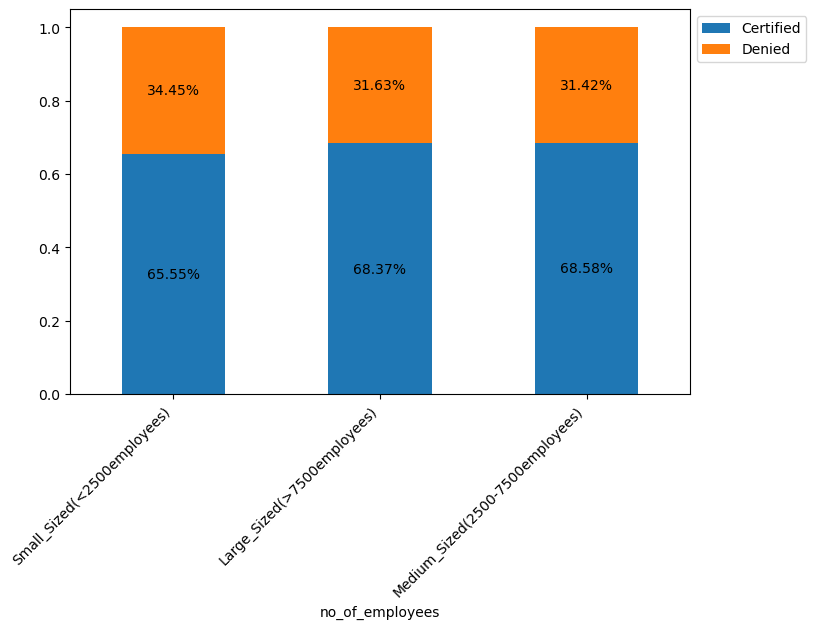

In [41]:
stacked_barplot(data, "no_of_employees", "case_status")

* Information is preserved in the binned data, with over 65% of cases certified across all categories.
* Company sizes are distributed as follows: 58% are small-sized (less than 2500 employees), 36% are medium-sized, and 6% are large-sized (more than 7500 employees).

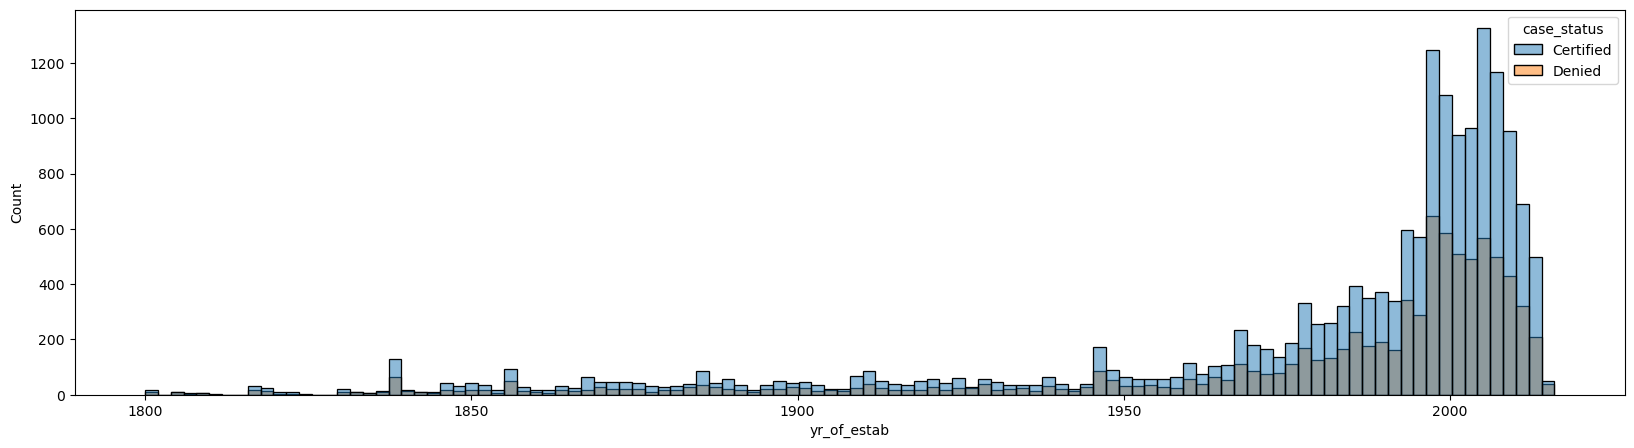

In [42]:
plt.figure(figsize = (20,5))
sns.histplot(data, x = "yr_of_estab", hue = "case_status")
plt.show()

* Slightly more than 50% of all cases are certified rather than denied, regardless of the employer's year of establishment
* The dataset contains a significant number of lower-end outliers, which will be binned accordingly.

In [43]:
data["yr_of_estab"] = pd.cut( data["yr_of_estab"], \
                                  [-np.inf, 1990, np.inf], \
                                  labels = ["Older_Estab(1800-1990)", \
                                            "Newer_Estab(>1990)"])
data["yr_of_estab"] = data["yr_of_estab"].astype("category")

case_status             Certified  Denied    All
yr_of_estab                                     
All                         17001    8446  25447
Newer_Estab(>1990)          10427    5083  15510
Older_Estab(1800-1990)       6574    3363   9937
------------------------------------------------------------------------------------------------------------------------


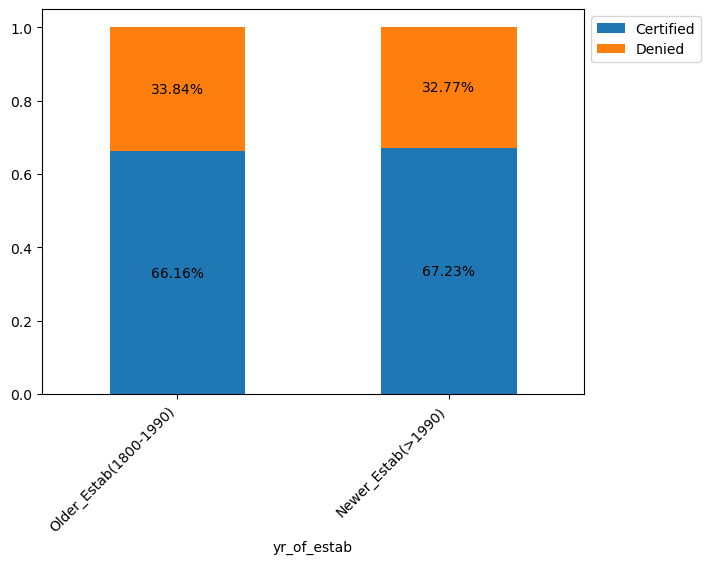

In [44]:
stacked_barplot(data, "yr_of_estab", "case_status")

* Binning retains information, with over 65% of cases approved in both categories.
* Approximately 61% of employers were established after 1990, while 39% were established before 1990.

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Not_Hourly        16254    7040  23294
Hourly              747    1406   2153
------------------------------------------------------------------------------------------------------------------------


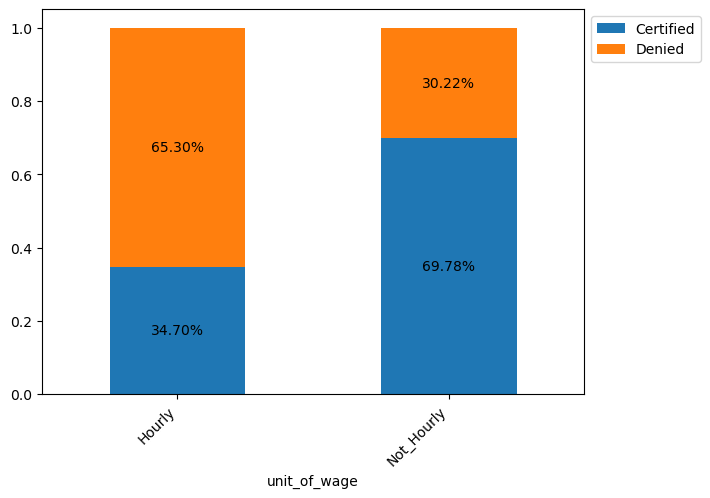

In [45]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Almost 70% of cases are certified when the unit_of_wage is not hourly, and only 35% cases are certified when the unit_of_wage is hourly

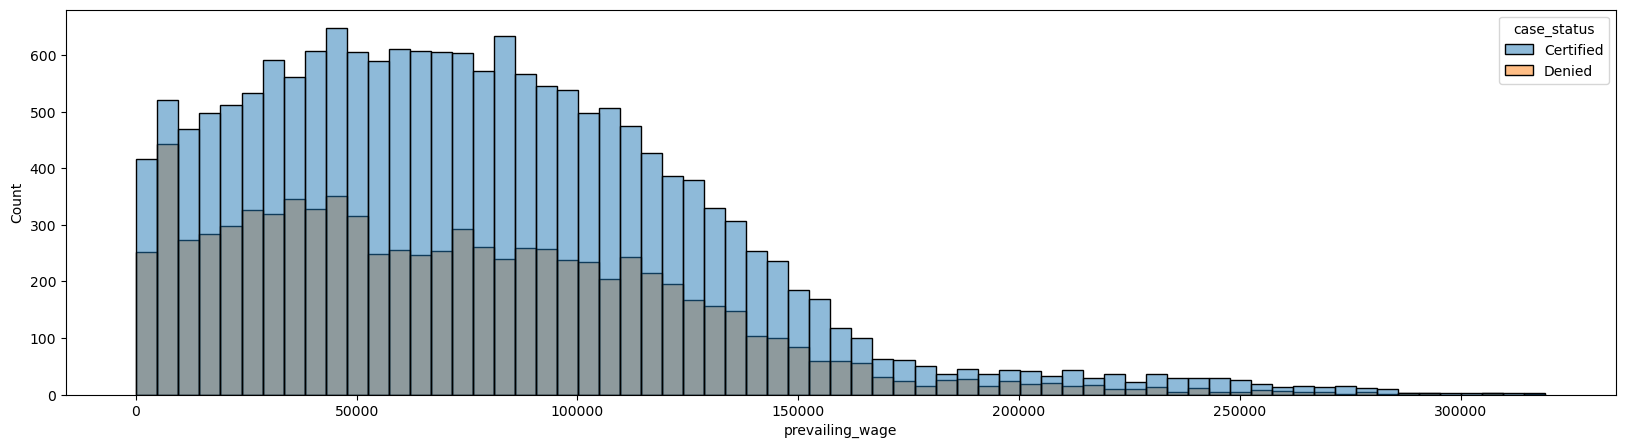

In [46]:
plt.figure(figsize=(20,5))
sns.histplot(data, x="prevailing_wage", hue="case_status");

* We observe outliers on both the lower end (USD 14,500 or less annually) and higher end (USD 200,000 or more annually) of the prevailing wage distribution. These outliers may represent unskilled positions or highly skilled positions, respectively. Overall, we see that cases are certified roughly twice as often as they are denied.
* The percentage of certifications, compared to denials, experiences a slight drop on the lower end of the prevailing wage distribution and a slight increase on the upper end.
* The number of outliers in the prevailing wage data is relatively lower than in other instances, and they have not been treated further. Decision trees are robust to outliers. Additionally, we observe similar responses in case statuses above a certain income threshold and below a certain threshold.

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


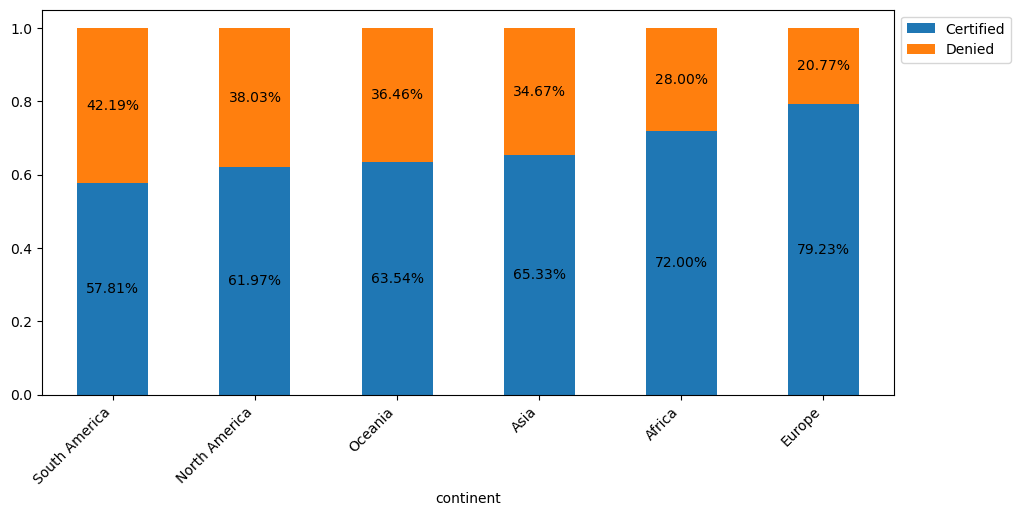

In [47]:
stacked_barplot(data, "continent", "case_status")

* Regardless of the employee's continent of origin, a higher number of cases receive certification rather than being denied
* The trend observed w.r.t % certification for continents is Europe > Africa > Asia > Oceania > North America & South America 

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


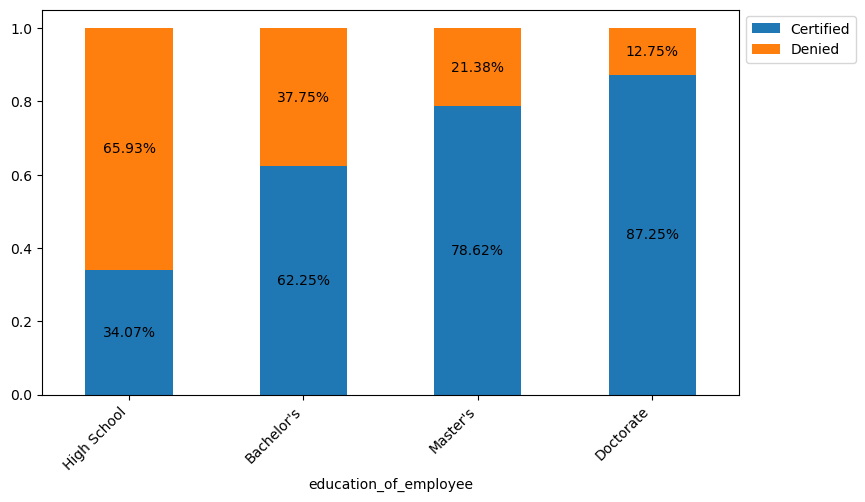

In [48]:
stacked_barplot(data, "education_of_employee", "case_status")

* As expected the, the trend observed w.r.t % visa certification for education of employees is Doctorate > Master's > Bachelor's > High School 

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


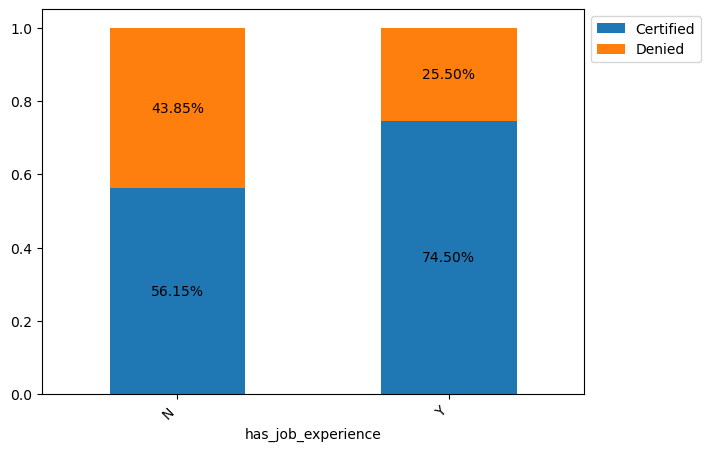

In [49]:
stacked_barplot(data, "has_job_experience", "case_status")

* As expected, the trend observed w.r.t % visa certifications for has_job_experience is Yes > No 

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


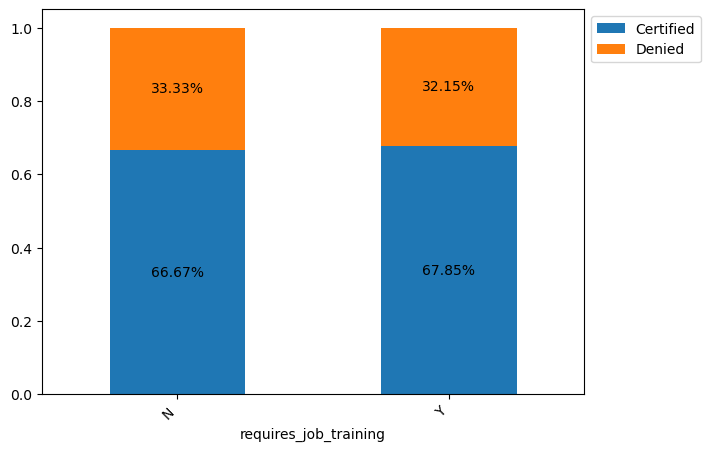

In [50]:
stacked_barplot(data, "requires_job_training", "case_status")

* The distribution is close to being balanced.

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


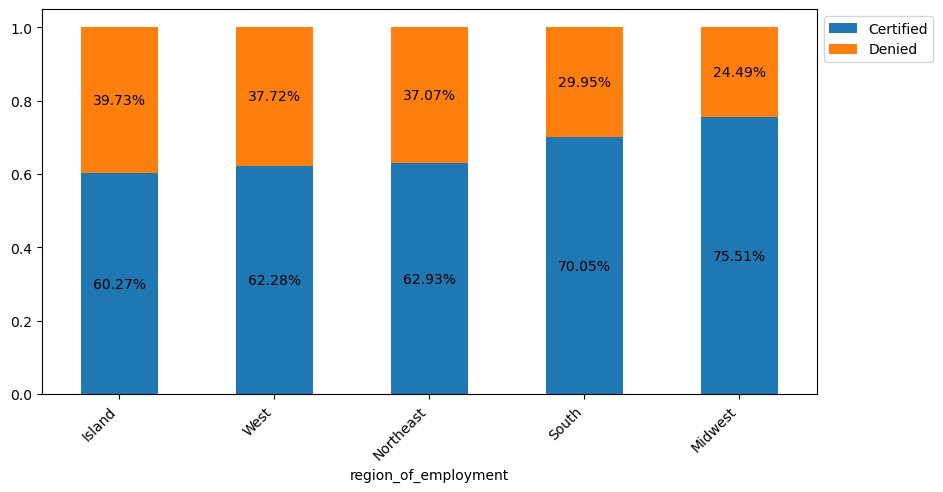

In [51]:
stacked_barplot(data, "region_of_employment", "case_status")

* The observed trend in visa certifications varies across regions of employment, with the order being MidWest, South, Northeast (with comparable percentages), West, and Island

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


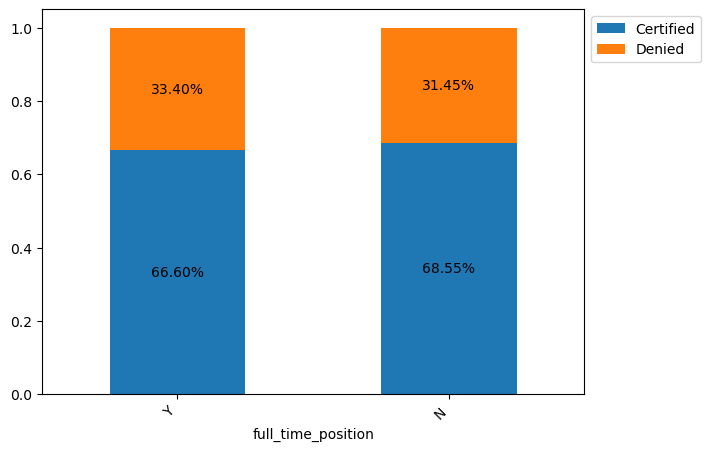

In [52]:
stacked_barplot(data, "full_time_position", "case_status")

* The distribution is close to being balanced.

### EDA Sumamrized 

* A significant number of cases were certified compared to those that were denied, regardless of the number of employees in the employer's organization or the year of the employer's organization's establishment. These attributes are therefore not believed to significantly affect case statuses.

   * Both of these attributes exhibit notable skewness: the number of employees is skewed to the right, while the year of establishment is skewed to the left.
  * According to exploratory data analysis (EDA), it was observed that 58% of all cases were associated with smaller organizations (having less than 2500 employees), and 61% of all cases were linked to employers established after 1990

- The unit_of_wage is a notable factor that can influence case statuses. Only 35% of cases were certified when the unit_of_wage was hourly, but 70% were certified when the unit_of_wage was not hourly (i.e., weekly, monthly, or yearly).
    - From EDA, it was noted that only 8.5% of all cases had hourly unit_of_wage, while the remaining 91.5% had non-hourly units (weekly, monthly, or yearly).
* The majority of cases come from applicants in Asia (66%), followed by Europe (15%), North America (13%), and South America (3%). However, the certification rate varies by continent, with Europe having the highest certification rate (80%), followed by Africa (72%), and Asia (65%), while South America and North America have certification rates around 60%. More cases are certified than denied regardless of the continent, suggesting that being from Europe is considered an important attribute influencing case statuses.
 
* Most applicants hold a bachelor's degree (40%) or a master's degree (37.87%). A smaller proportion has only high school certification (13.4%) or possesses doctorate degrees (8.6%). However, the certification rate varies with education level, with doctorate degree holders having the highest rate (>86%), followed by master's degree holders (>76%), and then bachelor's degree holders (approximately 62%). The certification rate is notably lower for applicants with only high school certification (less than 35%). This trend suggests that attributes related to having a doctorate degree and having only high school certification significantly contribute to the certification and denial of cases, respectively.

* According to EDA, approximately 58% of all applicants have prior job experience, while 42% do not. Cases involving applicants with prior job experience have a high certification rate (75%), whereas cases involving applicants without prior job experience have a lower certification rate (approximately 56%). This underscores the significance of prior job experience as an attribute influencing case certification.

* The requirement for additional job training was not found to significantly impact case statuses.

* The majority of applications are submitted for the Northeast region (28.3%), followed by the South (27.5%), the West (25.8%), the Midwest (16.9%), and, to a lesser extent, the Island region (1.5%) of the US. However, the certification rate follows a different trend, with the Midwest having the highest certification rate (75%), followed by the South (70%), and then the Northeast, West, and Island regions (all at 60%). This indicates that being in the Midwest region is an important attribute contributing positively to case certification.

* Whether a job is full-time or part-time was not found to significantly impact case statuses.

### Split the dataset

In [53]:
#mutate the case status to 1 and 0
data["case_status"] = data["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [54]:
#Separating features and the target column
X = data.drop("case_status", axis=1)
y = data["case_status"]

In [55]:
X = pd.get_dummies(X, drop_first=True)

In [56]:
#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [57]:
X_train.shape, X_test.shape

((17812, 20), (7635, 20))

In [58]:
y.value_counts(1)

case_status
1    0.668094
0    0.331906
Name: proportion, dtype: float64

In [59]:
y_train.value_counts(1)

case_status
1    0.668089
0    0.331911
Name: proportion, dtype: float64

In [60]:
y_train.value_counts(1)

case_status
1    0.668089
0    0.331911
Name: proportion, dtype: float64

* Stratify has maintained the distribution of classes when splitting to a train and test dataset

### Model evaluation criterion

The model can make wrong predictions as:
   - Certifying a case when the required criteria are not met.
   - Denying a case when the required criteria are met.

### Importance of Each Error

Both types of errors have significant implications:
 - (False Positives): Certifying cases when criteria are not met could lead to undesirable outcomes, potentially causing job loss for citizens and locals in the US, as well as the potential hiring of foreign workers at below-market pay rates.
 - (False Negatives): Denying cases when criteria are met could also have adverse effects, potentially resulting in human resource shortages across various occupations in the US, thereby slowing down economic growth.

### Metric for Optimization

To strike a balance and account for the potential impact of both types of errors, the F1-Score is the chosen metric for optimization. Maximizing the F1-Score aims to achieve a model that can correctly predict both classes while considering the significance of each type of error.

#### Functions to calculate performance metrics and create confusion matrix for different models

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [62]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Test performance:
    Accuracy    Recall  Precision        F1
0  0.661559  0.743384   0.748372  0.745869


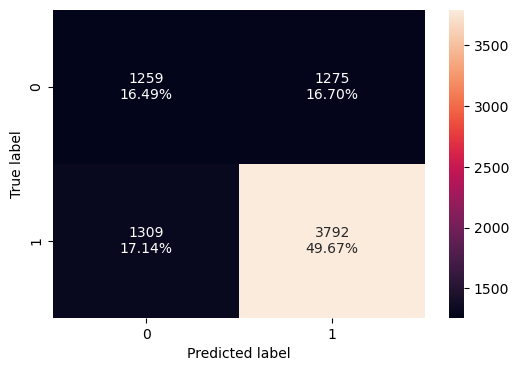

In [63]:
#Fitting the Decison three
d_tree = DecisionTreeClassifier(random_state = 1)
d_tree.fit(X_train, y_train)

#Calcualte the metrics
d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train, y_train)
print("Training performance:\n", d_tree_model_train_perf)

d_tree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Test performance:\n", d_tree_model_test_perf)

#Confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

*  The decision tree is overfitting the training data. Training metrics are high but the testing metrics are not. F1_score for the test set is only 0.75. We can improve model performance by hyperparameter tuning 

### Decision Tree - Hyperparameter tuning

In [64]:
# Start timing
start_time = time.time()

#Choose the classifier type
dtree_estimator = DecisionTreeClassifier(class_weight = {0:0.668,1:0.332}, random_state = 1) #weight are from y_train.value_counts(1)

#Grid search parameters
parameters = {
              'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]  
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring = scorer, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

#print the best parameters
print("Best Parameters:", dtree_estimator)

Elapsed time: 89.18306303024292 seconds
Best Parameters: DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)


Training performance:
    Accuracy    Recall  Precision        F1
0  0.711599  0.932605   0.719108  0.812059
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.709103  0.929034   0.718248  0.810155


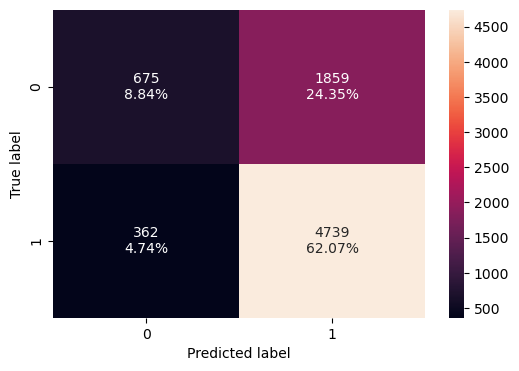

In [65]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The hyperparameter-tuned decision tree is no longer overfitting the dataset, and the F1 score has shown improvement. Both the training and test datasets now exhibit F1 scores of 0.81.

### Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999832  0.999916   0.999832  0.999874
Test performance:
    Accuracy    Recall  Precision        F1
0  0.676621  0.760047   0.756931  0.758486


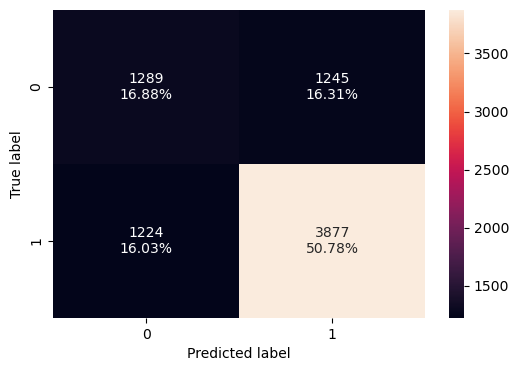

In [66]:
#Fit the random forest model
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(X_train, y_train)

#Calcualte the metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Training performance:\n", rf_estimator_model_train_perf)

rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Test performance:\n", rf_estimator_model_test_perf)

#Confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)


* Random forest model is also overfitting the training data

### Random Forest - Hyperparameter tuning

In [67]:
# Start timing
start_time = time.time()

#Choose the classifier type #weight are from y_train.value_counts(1)
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True) 

#Grid search parameters
parameters = {  
                'max_depth': list(np.arange(10,30,10)) + [None],
                'max_features': ['sqrt',None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20,120,40)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

#print the best parameters
print("Best Parameters:", rf_tuned)

Elapsed time: 145.79957151412964 seconds
Best Parameters: RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=10,
                       min_samples_leaf=5, min_samples_split=15, oob_score=True,
                       random_state=1)


Training performance:
    Accuracy    Recall  Precision        F1
0  0.745845  0.779916   0.829475  0.803933
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724689  0.760243    0.81522  0.786772


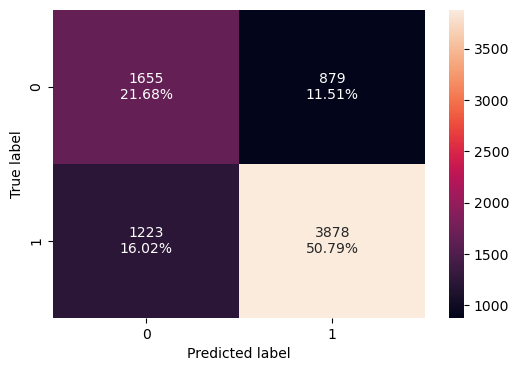

In [68]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* Hyperparameter tuning has reduced overfitting and improved the F1 score. However, this model is not performing as optimally as the hyperparameter-tuned decision tree.

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.977824  0.978655   0.988038  0.983324
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.688016  0.757106   0.771628  0.764298


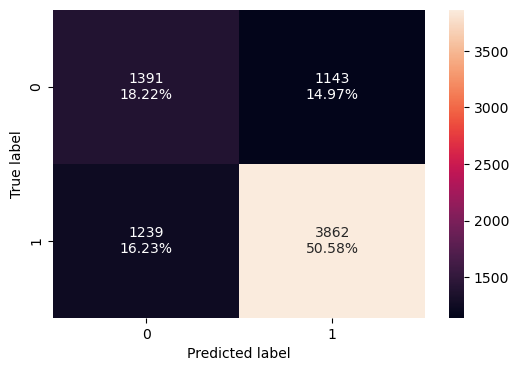

In [69]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is also overfiting the training data

### Bagging - Hyperparameter Tuning

In [70]:
# Start timing
start_time = time.time()

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

#print the best parameters
print("Best Parameters:", bagging_estimator_tuned)

Elapsed time: 114.33927202224731 seconds
Best Parameters: BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)


Training performance:
    Accuracy    Recall  Precision        F1
0  0.956041  0.993697   0.943509  0.967953
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728225  0.877475   0.755316  0.811826


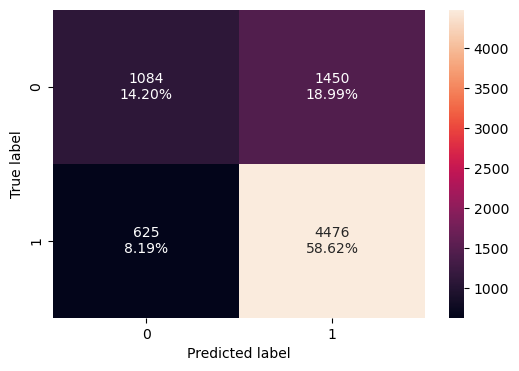

In [71]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* The model is still showing signs of overfitting the training data, as the training metrics are high while the testing metrics are not.

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738322  0.888151   0.760414  0.819334
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73556  0.877671   0.762432  0.816003


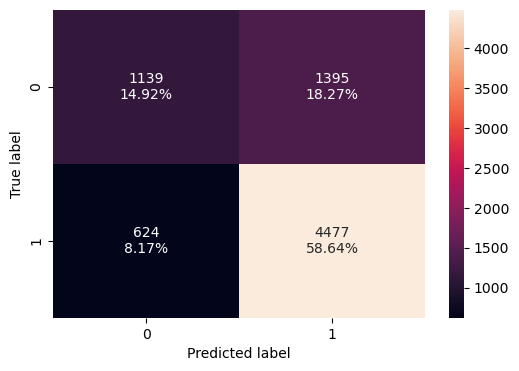

In [72]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n", ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Unlike the decision tree, random forest, or the bagging classifier, the AdaBoost classifier does not exhibit overfitting on the training data. It delivers consistent performance on both the training and testing data with F1 scores of 0.82

### AdaBoost - Hyperparamter tuning

In [73]:
# Start timing
start_time = time.time()

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

#print the best parameters
print("Best Parameters:", abc_tuned)

Elapsed time: 14.68190312385559 seconds
Best Parameters: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)


Training performance:
    Accuracy    Recall  Precision        F1
0   0.74927  0.870252   0.779937  0.822623
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.745514  0.861596   0.780362  0.81897


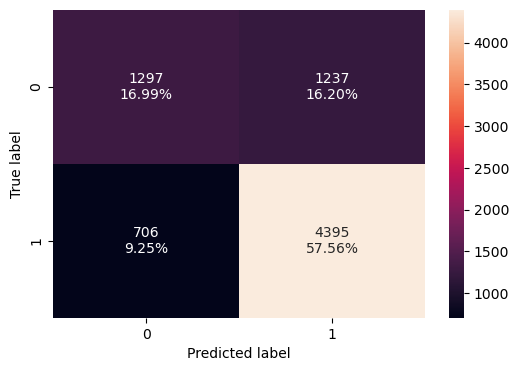

In [74]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n", abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The hyperparameter-tuned model is delivering a performance similar to that of the default AdaBoost model.

### Gradient Boosting Classifier 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755839  0.875882   0.783979  0.827386
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748527  0.865517   0.781554  0.821395


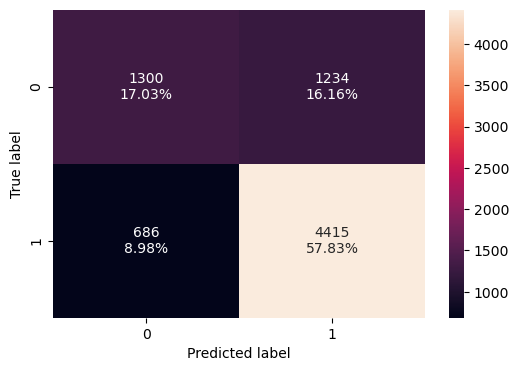

In [75]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting model demonstrates consistent performance on both the training and testing data, achieving high F1 scores of 0.82.

### Gradient Boosting - Hyperparameter Tuning

In [76]:
# Start timing
start_time = time.time()

# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

#print the best parameters
print("Best Parameters:", gbc_tuned)

Elapsed time: 41.33385992050171 seconds
Best Parameters: GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)


Training performance:
    Accuracy    Recall  Precision        F1
0  0.754379  0.876134   0.782322  0.826575
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746431  0.865321   0.779446  0.820141


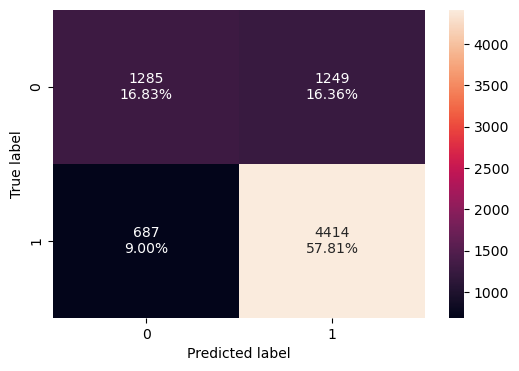

In [77]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* The model's performance shows little variation after hyperparameter tuning.

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision      F1
0  0.809903  0.914706   0.821138  0.8654
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737525  0.858851   0.773345  0.813858


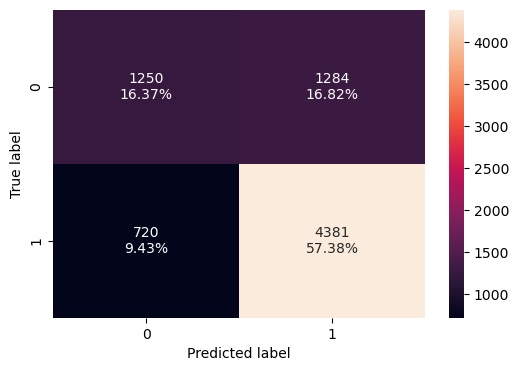

In [78]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* The XGBoost classifier exhibits a slight degree of overfitting on the training data.

### XGBoost - Hyperparameter tuning

In [79]:
# Start timing
start_time = time.time()

# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

#print the best parameters
print("Best Parameters:", xgb_tuned)

Elapsed time: 227.5213348865509 seconds
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)


Training performance:
    Accuracy    Recall  Precision        F1
0  0.745509  0.919916   0.753562  0.828471
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.738179  0.91041   0.750727  0.822894


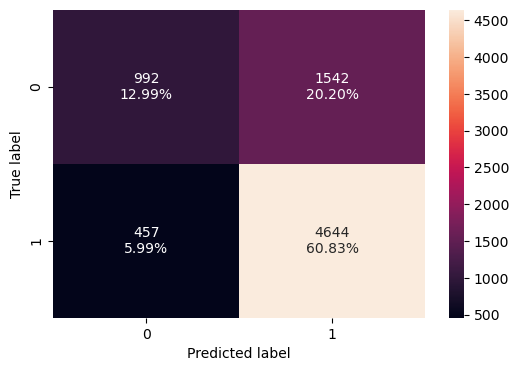

In [80]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* Overfitting has been mitigated, and the model now demonstrates consistent performance on both the training and testing data. F1 scores of 0.82 are achieved on both datasets.

### Stacking Classifier

In [81]:
estimators = [('Ad Boost Tuned',abc_tuned), ('Gradient Boost Tuned',gbc_tuned), ('Decision Tree Tuned',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Ad Boost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.2,
                                                   n_estimators=60,
                                                   random_state=1)),
                               ('Gradient Boost Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree Tuned',
                                DecisionTreeClassifier(c...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=30, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753312  0.881933    0.77833  0.826899
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.748657  0.872574   0.778147  0.82266


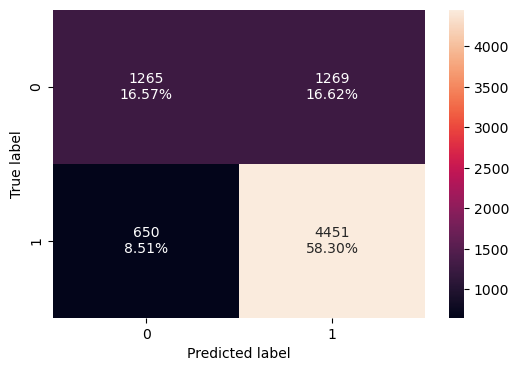

In [82]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The model's metrics closely resemble those observed in other models after hyperparameter tuning. It doesn't exhibit overfitting and provides consistent performance with training and testing F1 scores of 0.826 and 0.822.
* The model effectively identifies the majority of cases that should be certified, but it doesn't perform as well in correctly classifying cases that should be denied.

### Comparing all models

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.711599,0.999832,0.745845,0.977824,0.956041,0.738322,0.749270,0.755839,0.754379,0.809903,0.745509,0.753312
Recall,1.0,0.932605,0.999916,0.779916,0.978655,0.993697,0.888151,0.870252,0.875882,0.876134,0.914706,0.919916,0.881933
Precision,1.0,0.719108,0.999832,0.829475,0.988038,0.943509,0.760414,0.779937,0.783979,0.782322,0.821138,0.753562,0.778330
F1,1.0,0.812059,0.999874,0.803933,0.983324,0.967953,0.819334,0.822623,0.827386,0.826575,0.865400,0.828471,0.826899


In [84]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.661559,0.709103,0.676621,0.724689,0.688016,0.728225,0.735560,0.745514,0.748527,0.746431,0.737525,0.738179,0.748657
Recall,0.743384,0.929034,0.760047,0.760243,0.757106,0.877475,0.877671,0.861596,0.865517,0.865321,0.858851,0.910410,0.872574
Precision,0.748372,0.718248,0.756931,0.815220,0.771628,0.755316,0.762432,0.780362,0.781554,0.779446,0.773345,0.750727,0.778147
F1,0.745869,0.810155,0.758486,0.786772,0.764298,0.811826,0.816003,0.818970,0.821395,0.820141,0.813858,0.822894,0.822660


* Decision tree, Random forest (default & tuned), Bagging classifier (default & tuned) & XGBoost were found to overfit the training dataset
* Decision tree tuned, Adaboost (default & tuned), Gradient boost (default & tuned) and XGBoost (tuned) were found to give generalized performance on the training & testing data sets. Of these, the XGBoost (tuned) has the highest F1 score (although all models have more or less similar performance)



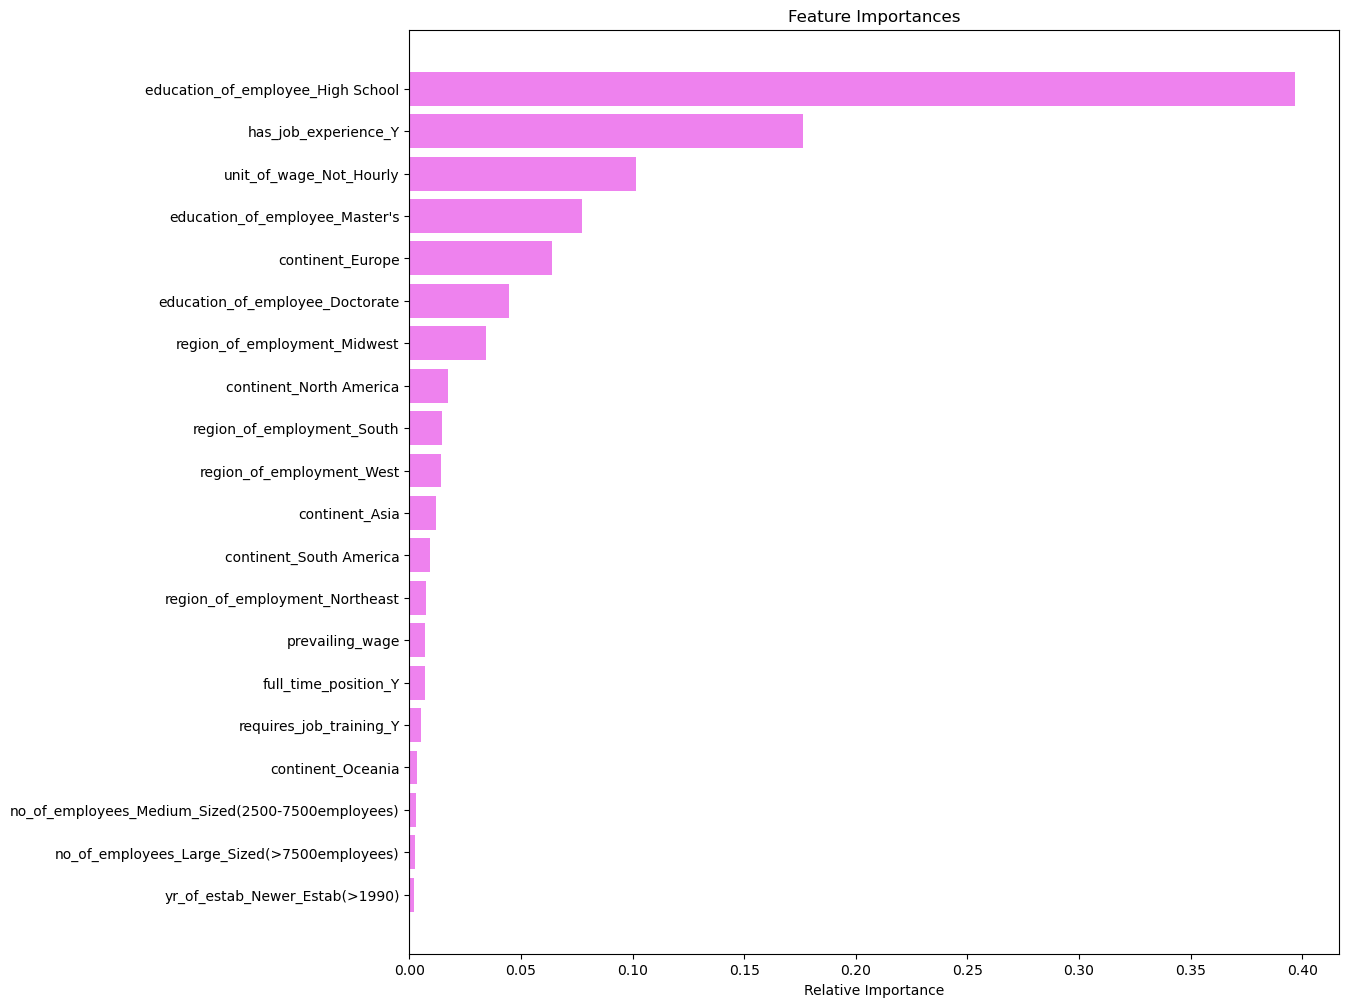

In [85]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The results obtained from the optimized model align closely with the observations made during the Exploratory Data Analysis (EDA) phase.
In particular, the education level of the employee emerged as the most significant attribute influencing the certification of visas. Additionally, the presence of prior job experience, the unit of wage, the employee's continent of origin, and the region of employment within the United States were also identified as important attributes with notable impacts on visa certifications.

# Summary

Based on the Exploratory Data Analysis (EDA) and the XGBoost(tuned) model, several key features have been identified as influential in determining visa certifications versus denials:

1. Education of Employee: The level of education is a crucial factor. An employee with only a high school certification has a relatively low chance of visa approval, around 65%. In contrast, an employee with a doctorate degree has a high probability, exceeding 85%, of getting their visa certified.

2. Unit of Wage: The unit of wage plays a significant role. Employees with hourly pay have a lower chance, over 65%, of visa approval compared to those with non-hourly pay (weekly, monthly, or yearly), which has an over 70% chance of visa certification.

3. Employee's Continent of Origin: The continent from which the employee hails is important. For example, employees from Europe have a remarkable 80% chance of visa certification. Additionally, having prior job experience significantly increases the chances of visa approval, with over 75% probability, while applicants without prior work experience face a 50% chance of denial.

4. Region of Employment in the US: The location of the employment opportunity within the United States is another crucial determinant. Cases in the Midwest or South regions have a high chance, over 70%, of getting certified.

Remarkably, attributes such as full-time or part-time job opportunities, the need for additional job training, the annual prevailing wage of the occupation in the US, the year of establishment of the employer's organization, and the number of employees in the organization are not found to be significant factors affecting visa certification.

The XGBoost hyperparameter-tuned machine learning model provides generalized predictions on both training and testing datasets, displaying robustness against overfitting. It achieves an accuracy of 73% on the test dataset, with an F1 score of 82%. Precision and recall are also high at 75% and 91%, respectively. While the model excels in identifying a high percentage of cases certified, it may require further refinement to enhance its ability to correctly identify cases that should be denied. This limitation should be considered, especially in cases of potential human resource shortages in the United States. Nevertheless, the model remains valuable, as it significantly reduces the time spent on the process.

# Refferences

[1] Improving Machine Learning Predictions with Ensemble Learning by Brijesh Soni, 2023

[2] Ensemble methods: bagging, boosting and stacking by Joseph Rocca, Arp 23, 2019

[3] Introduction to Bagging and Ensemble Methods by Vihar Kurama, 2020

[4] Understanding Boosting in Machine Learning: A Comprehensive Guide by Brijesh Soni, 2023

[5] Boosting Algorithms Explained by Zixuan Zhang, Jun 26, 2019

[6] Stacking to Improve Model Performance: A Comprehensive Guide on Ensemble Learning in Python by Brijesh Soni, 2023

[7] Customer-profiling-using-ML-EasyVisa by rochitasundar, 2022

[8] OpenAI's GPT-3.5 language model